In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import numpy as np
import easyocr
import cv2
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving surf.jpeg to surf.jpeg
Saving sign.png to sign.png


In [ ]:
#image_path = 'surf.jpeg'
image_path = 'image-3.webp'

In [ ]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(image_path)

#For each detection, it shows coordinates,text and probability.

In [ ]:
result

[([[345, 250], [1041, 250], [1041, 382], [345, 382]],
  'Free as a bird',
  0.8596165057604819)]

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text =result[0][1]
font = cv2.FONT_HERSHEY_COMPLEX

In [ ]:
image = cv2.imread(image_path)
image = cv2.rectangle(image,top_left,bottom_right,(0,255,0),3)
image = cv2.putText(image,text,top_left,font,0.5,(255,255,255),2,cv2.LINE_AA)

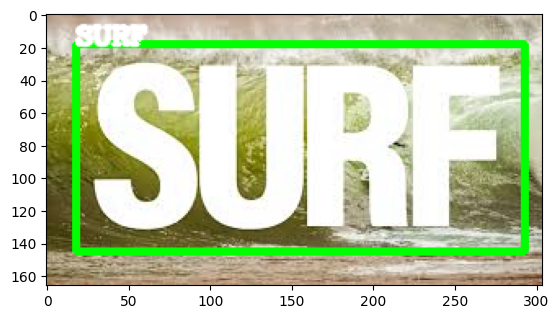

In [ ]:
plt.imshow(image)

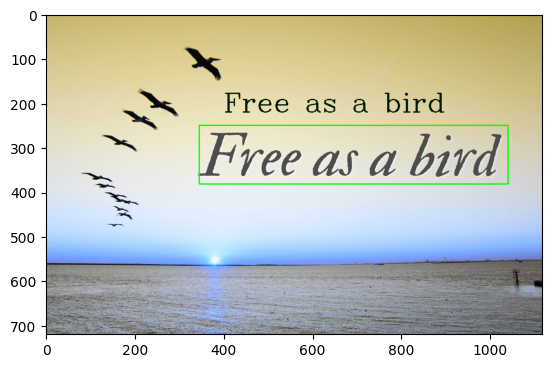

In [ ]:
image = cv2.imread(image_path)
font = cv2.FONT_HERSHEY_COMPLEX
space = 100
for detection in result:
  top_left = tuple(detection[0][0])
  bottom_right = tuple(detection[0][2])
  text = detection[1]
  image = cv2.rectangle(image,top_left,bottom_right,(0,255,0),2)
  #image = cv2.putText(image,text,(20,space),font,0.5,(0,255,0),2) #(20,space) is the coordinate of the starting point for the text.
  image = cv2.putText(image,text,(400,220),font,2,(0,25,0),2)
  space+=15
plt.imshow(image)